# Clustering

In [41]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

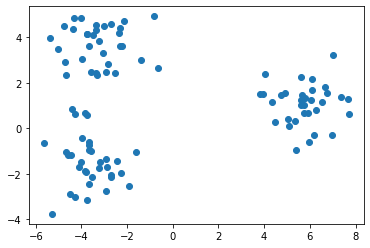

In [11]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1])

In [14]:
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_
model.predict(X)

array([1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1])

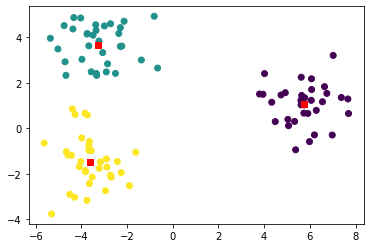

In [17]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r', marker='s')

In [16]:
model.cluster_centers_

array([[ 5.7606952 ,  1.06615495],
       [-3.25453028,  3.68372402],
       [-3.63938236, -1.45887099]])

In [18]:
model.inertia_

190.16497693338812

In [19]:
model.score(X)

-190.16497693338806

In [20]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'cout du modele (Inertia)')

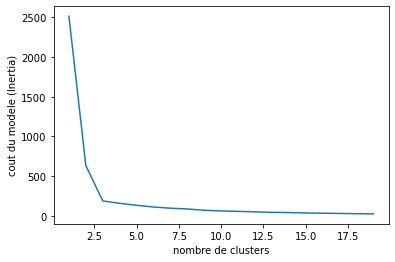

In [21]:
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('cout du modele (Inertia)')

A retenir dans le bibliotheque de sklearn.cluster: KMeans, AgglomerativeClustering(hierarchical clustering), DBSCAN(Density-based spatial clustering of applications with noise), SpectralClustering

# Isolation Forest: Anomaly Detection

In [25]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.7)
X[-1,:] = np.array([2.25, 5])

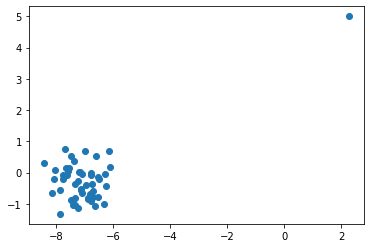

In [26]:
plt.scatter(X[:,0], X[:,1])

In [28]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

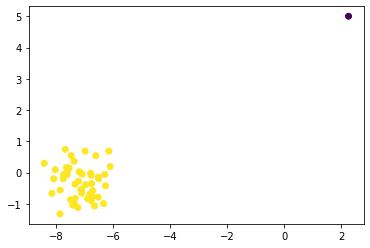

In [29]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

# Application Decontamination Digits

In [31]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


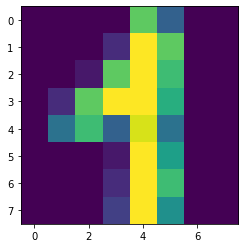

In [32]:
plt.imshow(images[42])

In [33]:
model = IsolationForest(random_state=0, contamination=0.02)

In [34]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [36]:
outliers = model.predict(X) == -1

In [37]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

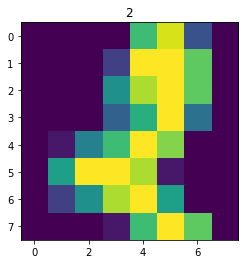

In [40]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

2 branches importantes de la detection d'anomalie: Outlier Detection (detecte les anomalies dans le Train_set avec Isolation Forest) et Novelty Detection (Detecte les anomalies dans les donnees futures avec Local Outlier Factor)

# PCA Reduction de dimension

In [43]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

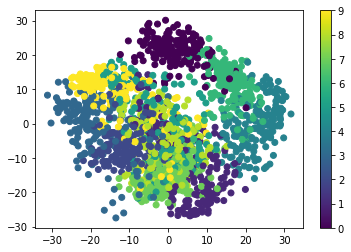

In [46]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

In [47]:
model.components_

array([[ 7.13199751e-18, -1.73094659e-02, -2.23428837e-01,
        -1.35913298e-01, -3.30323091e-02, -9.66340877e-02,
        -8.32943825e-03,  2.26900122e-03, -3.20516522e-04,
        -1.19308909e-01, -2.44451678e-01,  1.48512752e-01,
        -4.67319399e-02, -2.17740740e-01, -1.48136765e-02,
         4.47779551e-03, -4.94136416e-05, -7.95419446e-02,
         8.33951410e-02,  2.15915348e-01, -1.72126805e-01,
        -1.63712096e-01,  2.86444463e-02,  4.23251812e-03,
         9.85488574e-05,  6.42319101e-02,  2.54093310e-01,
        -3.56770994e-02, -2.09462577e-01, -4.31311472e-02,
         5.13118694e-02,  2.13422733e-04,  0.00000000e+00,
         1.59950880e-01,  3.68690774e-01,  1.64406829e-01,
         8.52007892e-02,  3.72982828e-02,  2.15866990e-02,
         0.00000000e+00,  1.28865578e-03,  1.06945283e-01,
         3.03067454e-01,  2.47813034e-01,  2.09637295e-01,
         1.22325212e-02, -3.69458463e-02,  1.61485043e-03,
         6.93023504e-04, -8.35144409e-03, -5.58599029e-0

In [48]:
model.components_.shape

(2, 64)

In [55]:
model = PCA(n_components=40)
X_reduced = model.fit_transform(X)

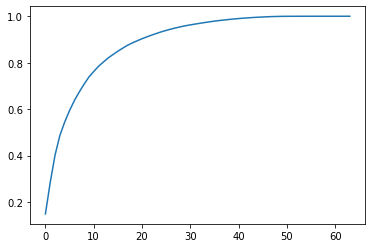

In [51]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [54]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)

40

In [56]:
X_recovered = model.inverse_transform(X_reduced)

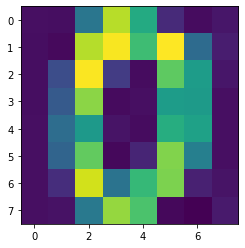

In [57]:
plt.imshow(X_recovered[0].reshape((8,8)))

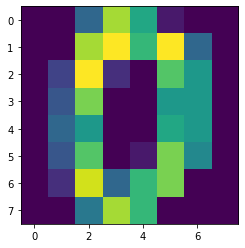

In [58]:
plt.imshow(images[0])

# Quelques points importants

Il faut standardiser les donnees avant d'appliquer PCA (StandardScaler)

PCA est normalement concu pour traiter les variables continues

PCA n'est pas efficace sur les datasets non-lineaires. Il faut utiliser le Manifold Learning (IsoMap ou T-SNE)